In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("mail_data.csv")

In [3]:
df.sample(5)

,Category,Message
4744,ham,I am in hospital da. . I will return home in e...
3252,ham,"I‘ll leave around four, ok?"
5532,ham,happened here while you were adventuring
2043,ham,"Me not waking up until 4 in the afternoon, sup"
1827,ham,Dude. What's up. How Teresa. Hope you have bee...


In [4]:
df.shape

(5572, 2)

In [5]:
#1 data cleaning:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename(columns={'Category':'target', 'Message': 'text'}, inplace=True)


In [7]:
df.sample(5)

,target,text
4769,ham,I'm not sure if its still available though
1410,ham,Where at were hungry too
1883,ham,"Sorry, I can't help you on this."
3145,ham,"Haha I heard that, text me when you're around"
2810,ham,Oh yeah I forgot. U can only take 2 out shoppi...


In [8]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
df.duplicated().sum()

415

In [10]:
#removing duplicted values
df=df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5157, 2)

EDA

In [13]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['target'].value_counts()

ham     4516
spam     641
Name: target, dtype: int64

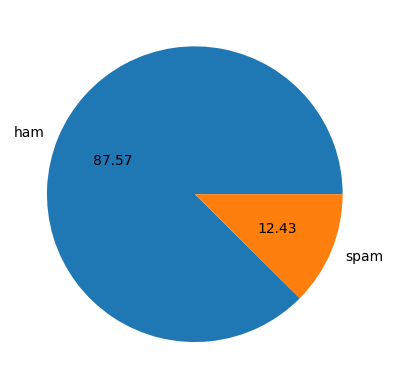

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels =['ham','spam'], autopct='%0.2f')
plt.show()

#unbalanced data

In [16]:
df.shape

(5157, 2)

In [17]:
a=df
a.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
a.target.value_counts()
# ham = majority class
#spam minority

ham     4516
spam     641
Name: target, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
#ham 0     spam 1

In [22]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
# !pip install imblearn

In [25]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()


In [26]:
X=df
Y=df['target']

In [27]:
df.target.value_counts()

0    4516
1     641
Name: target, dtype: int64

In [28]:
from imblearn import under_sampling,over_sampling


In [29]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_resampled, y_resampled=ros.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)

[(0, 4516), (1, 4516)] (9032,)


In [30]:
X.head()
X.target.value_counts()

0    4516
1     641
Name: target, dtype: int64

In [31]:
print(X_resampled)
print(y_resampled)

      target                                               text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
9027       1  I want some cock! My hubby's away, I need a re...
9028       1  You have won a Nokia 7250i. This is what you g...
9029       1  Are you unique enough? Find out from 30th Augu...
9030       1  Congratulations ur awarded 500 of CD vouchers ...
9031       1  5p 4 alfie Moon's Children in need song on ur ...

[9032 rows x 2 columns]
0       0
1       0
2       1
3       0
4       0
       ..
9027    1
9028    1
9029    1
9030    1
9031    1
Name: target, Length: 9032, dtype: int32


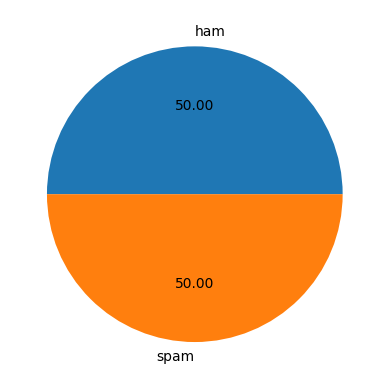

In [32]:
import matplotlib.pyplot as plt
plt.pie(y_resampled.value_counts(), labels =['ham','spam'], autopct='%0.2f')
plt.show()

#balanced data

In [33]:
df.sample(7)

,target,text
1906,0,"There're some people by mu, I'm at the table b..."
4523,0,DO U WANT 2 MEET UP 2MORRO
4677,0,Ü ready then call me...
838,0,"Sir, I have been late in paying rent for the p..."
4893,0,Miserable. They don't tell u that the side eff...
1290,0,Hey...Great deal...Farm tour 9am to 5pm $95/pa...
921,0,When u wana see it then


In [34]:
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Split  data into features (X) and target labels (y)
X = df['text']   #input data (a feature)
y = df['target'] #output

#  training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # 80 20 split

# new DataFrames for the training and testing set
train_data = pd.DataFrame({'target': y_train, 'text': X_train})
test_data = pd.DataFrame({'target': y_test, 'text': X_test})

# Save the training and testing DataFrames to separate CSV files
#saving into new files
train_data.to_csv("train_dataset.csv", sep='\t', index=False)
test_data.to_csv("test_dataset.csv", sep='\t', index=False)


##Naive Bayes

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Load the training dataset
train_df = pd.read_csv("train_dataset.csv", sep='\t')

# Create a pipeline with a TF-IDF vectorizer and a Naive Bayes classifier
pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Fit the pipeline on the training data
pipeline.fit(train_df['text'], train_df['target'])

# Load the testing dataset
test_df = pd.read_csv("test_dataset.csv", sep='\t')

# Make predictions on the testing data
predictions = pipeline.predict(test_df['text'])

# Print classification report
print(classification_report(test_df['target'], predictions))


#recall--- True Positive Rate---measures how many of the actual positive cases (instances belonging to a specific class) the model was able to find correctly.
#ham 0   spam 1

# # In NB, the algorithm looks at the words in the text to make guesses.
# If the words in the text mostly relate to one class, NB will guess that class.
# In an imbalanced dataset, where one class is rare, there might not be enough examples to show all the words related to that class.
# This means that NB might not recognize the rare class's unique words and patterns, making it biased towards the more common class.

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       896
           1       1.00      0.64      0.78       136

    accuracy                           0.95      1032
   macro avg       0.97      0.82      0.88      1032
weighted avg       0.95      0.95      0.95      1032



In [37]:
#applying smote

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load the training dataset
train_df = pd.read_csv("train_dataset.csv", sep='\t')

# Separate features (X) and target labels (y)
X_train = train_df['text']
y_train = train_df['target']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer() #Converting numerical to test

# Apply TF-IDF vectorization to the text data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Create a pipeline with a Naive Bayes classifier
pipeline = make_pipeline(MultinomialNB())

# Fit the pipeline on the resampled training data
pipeline.fit(X_resampled, y_resampled)

# Load the testing dataset
test_df = pd.read_csv("test_dataset.csv", sep='\t')

# Transform the text data using the same vectorizer
X_test_tfidf = vectorizer.transform(test_df['text'])

# Make predictions on the testing data
predictions = pipeline.predict(X_test_tfidf)

# Print classification report
print(classification_report(test_df['target'], predictions))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.85      0.96      0.90       136

    accuracy                           0.97      1032
   macro avg       0.92      0.97      0.94      1032
weighted avg       0.98      0.97      0.97      1032



In [39]:
import pandas as pd

# Reading the training and testing datasets
train_data = pd.read_csv("train_dataset.csv", sep='\t')
test_data = pd.read_csv("test_dataset.csv", sep='\t')


print("Training Dataset:")
print(train_data.head())

print("\nTesting Dataset:")
print(test_data.head())


Training Dataset:
   target                                               text
0       0  Got fujitsu, ibm, hp, toshiba... Got a lot of ...
1       0  So how are you really. What are you up to. How...
2       0                    I see a cup of coffee animation
3       0      This pain couldn't have come at a worse time.
4       0                             Also where's the piece

Testing Dataset:
   target                                               text
0       0  Also sir, i sent you an email about how to log...
1       0                   Are you free now?can i call now?
2       0  My supervisor find 4 me one lor i thk his stud...
3       0  She.s good. She was wondering if you wont say ...
4       1  Sorry I missed your call let's talk when you h...


##Random Forest

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame named 'df' with 'text' and 'target' columns
# If not, load the train_data and test_data DataFrames you created earlier

# Split data into features (X) and target labels (y)
X = df['text']  # Input data (a feature)
y = df['target']  # Output

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the TF-IDF transformed training data
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the TF-IDF transformed test data
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# You can also save the trained model if needed
# joblib.dump(rf_classifier, 'random_forest_model.joblib')


Accuracy: 0.9767441860465116
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.98      0.84      0.90       136

    accuracy                           0.98      1032
   macro avg       0.98      0.92      0.95      1032
weighted avg       0.98      0.98      0.98      1032



In [41]:
# applying SMOTE

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Assuming you have a DataFrame named 'df' with 'text' and 'target' columns
# If not, load the train_data and test_data DataFrames you created earlier

# Load the training dataset
train_df = pd.read_csv("train_dataset.csv", sep='\t')

# Separate features (X) and target labels (y)
X_train = train_df['text']
y_train = train_df['target']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to the text data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Split into training and testing sets (80% train, 20% test)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled test data
y_pred_resampled = rf_classifier.predict(X_test_resampled)

# Calculate accuracy on the resampled test data
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print('Accuracy on resampled test data:', accuracy_resampled)

# Transform the text data in the testing dataset using the same vectorizer
test_df = pd.read_csv("test_dataset.csv", sep='\t')
X_test_tfidf = vectorizer.transform(test_df['text'])

# Make predictions on the original testing data
predictions = rf_classifier.predict(X_test_tfidf)

# Print classification report
print('Classification Report:')
print(classification_report(test_df['target'], predictions))


Accuracy on resampled test data: 0.9910220994475138
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       136

    accuracy                           0.98      1032
   macro avg       0.99      0.94      0.96      1032
weighted avg       0.98      0.98      0.98      1032



##Logistic Regression

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame named 'df' with 'text' and 'target' columns
# If not, load the train_data and test_data DataFrames you created earlier

# Split data into features (X) and target labels (y)
X = df['text']  # Input data (a feature)
y = df['target']  # Output

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)

# Fit the model to the TF-IDF transformed training data
lr_classifier.fit(X_train_tfidf, y_train)

# Predict on the TF-IDF transformed test data
y_pred = lr_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# You can also save the trained model if needed
# joblib.dump(lr_classifier, 'logistic_regression_model.joblib')


Accuracy: 0.9709302325581395
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.98      0.79      0.88       136

    accuracy                           0.97      1032
   macro avg       0.98      0.90      0.93      1032
weighted avg       0.97      0.97      0.97      1032



In [44]:
#applying SMOTE

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Assuming you have a DataFrame named 'df' with 'text' and 'target' columns
# If not, load the train_data and test_data DataFrames you created earlier

# Load the training dataset
train_df = pd.read_csv("train_dataset.csv", sep='\t')

# Separate features (X) and target labels (y)
X_train = train_df['text']
y_train = train_df['target']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to the text data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Split into training and testing sets (80% train, 20% test)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)

# Fit the model to the resampled training data
lr_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled test data
y_pred_resampled = lr_classifier.predict(X_test_resampled)

# Calculate accuracy on the resampled test data
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print('Accuracy on resampled test data:', accuracy_resampled)

# Transform the text data in the testing dataset using the same vectorizer
test_df = pd.read_csv("test_dataset.csv", sep='\t')
X_test_tfidf = vectorizer.transform(test_df['text'])

# Make predictions on the original testing data
predictions = lr_classifier.predict(X_test_tfidf)

# Print classification report
print('Classification Report:')
print(classification_report(test_df['target'], predictions))


Accuracy on resampled test data: 0.9848066298342542
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       896
           1       0.90      0.96      0.93       136

    accuracy                           0.98      1032
   macro avg       0.95      0.97      0.96      1032
weighted avg       0.98      0.98      0.98      1032



##Decision Tree

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame named 'df' with 'text' and 'target' columns
# If not, load the train_data and test_data DataFrames you created earlier

# Split data into features (X) and target labels (y)
X = df['text']  # Input data (a feature)
y = df['target']  # Output

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the TF-IDF transformed training data
dt_classifier.fit(X_train_tfidf, y_train)

# Predict on the TF-IDF transformed test data
y_pred = dt_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# You can also save the trained model if needed
# joblib.dump(dt_classifier, 'decision_tree_model.joblib')


Accuracy: 0.9612403100775194
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       896
           1       0.86      0.85      0.85       136

    accuracy                           0.96      1032
   macro avg       0.92      0.91      0.91      1032
weighted avg       0.96      0.96      0.96      1032



In [47]:
#applying smote

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Assuming you have a DataFrame named 'df' with 'text' and 'target' columns
# If not, load the train_data and test_data DataFrames you created earlier

# Load the training dataset
train_df = pd.read_csv("train_dataset.csv", sep='\t')

# Separate features (X) and target labels (y)
X_train = train_df['text']
y_train = train_df['target']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to the text data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Split into training and testing sets (80% train, 20% test)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the resampled training data
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled test data
y_pred_resampled = dt_classifier.predict(X_test_resampled)

# Calculate accuracy on the resampled test data
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print('Accuracy on resampled test data:', accuracy_resampled)

# Transform the text data in the testing dataset using the same vectorizer
test_df = pd.read_csv("test_dataset.csv", sep='\t')
X_test_tfidf = vectorizer.transform(test_df['text'])

# Make predictions on the original testing data
predictions = dt_classifier.predict(X_test_tfidf)

# Print classification report
print('Classification Report:')
print(classification_report(test_df['target'], predictions))


Accuracy on resampled test data: 0.9751381215469613
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       896
           1       0.79      0.84      0.81       136

    accuracy                           0.95      1032
   macro avg       0.88      0.90      0.89      1032
weighted avg       0.95      0.95      0.95      1032



##Combined Random forest and logistic regression

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load the training dataset
train_df = pd.read_csv("train_dataset.csv", sep='\t')

# Separate features (X) and target labels (y)
X_train = train_df['text']
y_train = train_df['target']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to the text data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Split into training and testing sets (80% train, 20% test)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create individual classifiers
lr_classifier = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Create a Voting Classifier with soft voting
voting_classifier = VotingClassifier(estimators=[
    ('logistic_regression', lr_classifier),
    ('random_forest', rf_classifier)
], voting='soft')

# Fit the Voting Classifier to the resampled training data
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled test 44data
y_pred_resampled = voting_classifier.predict(X_test_resampled)

# Calculate accuracy on the resampled test data
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print('Accuracy on resampled test data:', accuracy_resampled)

# Transform the text data in the testing dataset using the same vectorizer
test_df = pd.read_csv("test_dataset.csv", sep='\t')
X_test_tfidf = vectorizer.transform(test_df['text'])

# Make predictions on the original testing data
predictions = voting_classifier.predict(X_test_tfidf)

# Print classification report
print('Classification Report:')
print(classification_report(test_df['target'], predictions))


Accuracy on resampled test data: 0.9937845303867403
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       896
           1       0.96      0.92      0.94       136

    accuracy                           0.98      1032
   macro avg       0.97      0.96      0.97      1032
weighted avg       0.98      0.98      0.98      1032



saving

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import joblib  # Import joblib for model saving

# Load the training dataset
train_df = pd.read_csv("train_dataset.csv", sep='\t')

# Separate features (X) and target labels (y)
X_train = train_df['text']
y_train = train_df['target']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to the text data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Split into training and testing sets (80% train, 20% test)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create individual classifiers
lr_classifier = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Create a Voting Classifier with soft voting
voting_classifier = VotingClassifier(estimators=[
    ('logistic_regression', lr_classifier),
    ('random_forest', rf_classifier)
], voting='soft')

# Fit the Voting Classifier to the resampled training data
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Save the TF-IDF vectorizer and the trained model
joblib.dump(vectorizer, "tfidf_vectorizer_model.joblib")
joblib.dump(voting_classifier, "voting_classifier_model.joblib")

# Adjust the decision threshold
voting_classifier.threshold = 0.6  # Adjust the threshold as needed

# Predict on the resampled test data
y_pred_resampled = voting_classifier.predict(X_test_resampled)

# Calculate accuracy on the resampled test data
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print('Accuracy on resampled test data:', accuracy_resampled)

# Transform the text data in the testing dataset using the same vectorizer
test_df = pd.read_csv("test_dataset.csv", sep='\t')
X_test_tfidf = vectorizer.transform(test_df['text'])

# Make predictions on the original testing data
predictions = voting_classifier.predict(X_test_tfidf)

# Print classification report
print('Classification Report:')
print(classification_report(test_df['target'], predictions))


Accuracy on resampled test data: 0.9937845303867403
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       896
           1       0.96      0.92      0.94       136

    accuracy                           0.98      1032
   macro avg       0.97      0.96      0.97      1032
weighted avg       0.98      0.98      0.98      1032



In [51]:
# !pip install joblib

In [52]:
import joblib

def classify_text(message, threshold=0.5):
    # Load the saved TF-IDF vectorizer and Voting Classifier
    vectorizer = joblib.load("tfidf_vectorizer_model.joblib")
    voting_classifier = joblib.load("voting_classifier_model.joblib")

    # Preprocess the new message
    preprocessed_message = vectorizer.transform([message])

    # Use the loaded Voting Classifier for prediction
    predicted_prob = voting_classifier.predict_proba(preprocessed_message)[:, 1]

    # Apply the threshold to make the final prediction
    predicted_class = 1 if predicted_prob > threshold else 0

    # Return the result
    return "spam" if predicted_class == 1 else "ham"

# List of test messages
test_samples = [
    "Hey, just wanted to check in and see how you're doing. Let's catch up soon!",
    "You've won a free vacation! Click here to claim your prize.",
    "URGENT: Your account has been compromised. Please click the link to secure it.",
    "Congratulations! You've been selected for a special offer. Claim now!",
    "Meeting at 2 PM in the conference room. Please be on time.",
    "You have a package waiting for you at the post office. Visit us to collect it.",
    "Exclusive limited-time offer: Buy one, get one free!",
    "Reminder: Your subscription will expire soon. Renew now to continue access.",
    "Click the link to participate in our survey and win exciting prizes!",
    "Important update: Your flight has been rescheduled. Check the details here.",
    "Your entry has won a cash prize! Click here to claim.",
    "Don't miss out on this amazing opportunity. Act now!",
    "URGENT: Your account needs verification. Click the link to confirm.",
    "Limited-time offer: 50% off on all purchases. Shop now!",
    "Congratulations! You're the winner of our weekly giveaway.",
    "Important security update: Change your password immediately.",
    "Get a free trial of our premium service. Sign up today!",
    "You've been selected for a special promotion. Redeem your reward.",
    "Meeting at 3 PM in the main lobby. Attendees, please be on time.",
    "Reminder: Your subscription renewal is due. Renew now to continue.",
]

# Test the function on the list of messages
for message in test_samples:
    result = classify_text(message)
    print(f"Message: {message}, Predicted: {result}")


Message: Hey, just wanted to check in and see how you're doing. Let's catch up soon!, Predicted: ham
Message: You've won a free vacation! Click here to claim your prize., Predicted: spam
Message: URGENT: Your account has been compromised. Please click the link to secure it., Predicted: ham
Message: Congratulations! You've been selected for a special offer. Claim now!, Predicted: spam
Message: Meeting at 2 PM in the conference room. Please be on time., Predicted: ham
Message: You have a package waiting for you at the post office. Visit us to collect it., Predicted: ham
Message: Exclusive limited-time offer: Buy one, get one free!, Predicted: ham
Message: Reminder: Your subscription will expire soon. Renew now to continue access., Predicted: ham
Message: Click the link to participate in our survey and win exciting prizes!, Predicted: ham
Message: Important update: Your flight has been rescheduled. Check the details here., Predicted: ham
Message: Your entry has won a cash prize! Click her

In [53]:
# Additional test samples
additional_samples = [
    "You're the winner of a brand new car! Click to claim your prize.",
    "Important security update: Your password has been reset. Click to confirm.",
    "Free trial offer: Experience our premium services at no cost. Sign up now!",
    "Exclusive deal: Buy one, get one free on all products. Limited stock!",
    "Your entry has been selected for a luxury vacation. Click to redeem your reward.",
    "URGENT: Your bank account has been suspended. Click to verify your identity.",
    "Special invitation: Join us for an exclusive event. RSVP now!",
    "Congratulations! You've won a cash prize. Click to claim your winnings.",
    "Reminder: Your subscription will auto-renew soon. Update your preferences.",
    "Get 50% off on your next purchase. Limited-time offer. Shop now!",
]

# Test the function on the additional list of messages
for message in additional_samples:
    result = classify_text(message)
    print(f"Message: {message}, Predicted: {result}")


Message: You're the winner of a brand new car! Click to claim your prize., Predicted: spam
Message: Important security update: Your password has been reset. Click to confirm., Predicted: ham
Message: Free trial offer: Experience our premium services at no cost. Sign up now!, Predicted: spam
Message: Exclusive deal: Buy one, get one free on all products. Limited stock!, Predicted: ham
Message: Your entry has been selected for a luxury vacation. Click to redeem your reward., Predicted: spam
Message: URGENT: Your bank account has been suspended. Click to verify your identity., Predicted: ham
Message: Special invitation: Join us for an exclusive event. RSVP now!, Predicted: ham
Message: Congratulations! You've won a cash prize. Click to claim your winnings., Predicted: spam
Message: Reminder: Your subscription will auto-renew soon. Update your preferences., Predicted: ham
Message: Get 50% off on your next purchase. Limited-time offer. Shop now!, Predicted: ham


In [54]:
classify_text("Hi Pranav Batki, We recently launched a deep integration with Keras! Check out this short video walking through the details with François Chollet (Keras founder) and Meg Risdal (Kaggle Product Manager).")


'ham'

In [55]:
#   http://127.0.0.1:5000/

## paste this in ur browser to run